This note disiplays the results of our hyper parameter tuning for the semi-supervised MNIST task

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

These were the learning rates considered

In [2]:
lr_vec = ['5e-3', '1e-3', '5e-4', '1e-4', '5e-5']

# REINFORCE

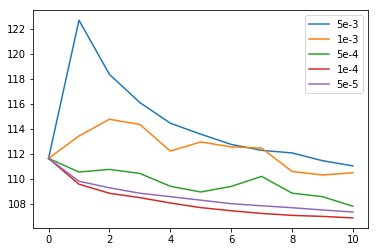

In [3]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

In [4]:
test_loss_array

array([113.56526184, 111.81802368, 110.82701111, 107.00719452,
       107.49534607])

# Fully marginalized

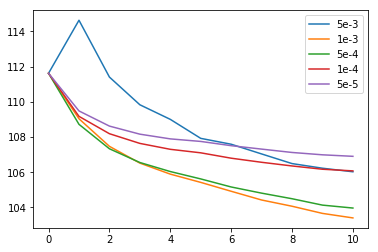

In [5]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_fully_marg_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_fully_marg_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

In [6]:
test_loss_array

array([108.29000092, 104.92524719, 104.95937347, 106.26143646,
       106.98004913])

# Rao-Blackwellized

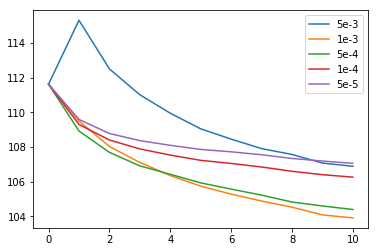

In [7]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_topk1_lr' \
                           + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_reinforce_topk1_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

In [8]:
test_loss_array

array([109.75009918, 105.18820953, 105.12813568, 106.42855072,
       107.10403442])

# NVIL

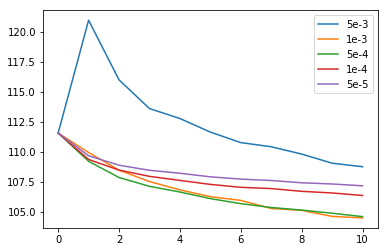

In [9]:
test_loss_array = np.zeros(len(lr_vec))
i = 0

plt.plot()
for lr in lr_vec:
    batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_nvil_lr' + lr + '_batch_losses.npy')
    plt.plot(batch_losses, label = lr)
    
    test_loss_array[i] = np.load('../mnist_vae_results/tuning_results/ss_vae_nvil_lr' \
                           + lr + '_test_losses.npy')[-1]
    i += 1
    
plt.legend()

In [10]:
test_loss_array

array([111.05149841, 104.96695709, 105.38101196, 106.48995972,
       107.17150879])

# Gumbel-softmax

In [11]:
# for Gumbel-softmax, we also consider the annealing rate
annealr_vec = ['1e-5', '5e-5', '1e-4', '5e-4']

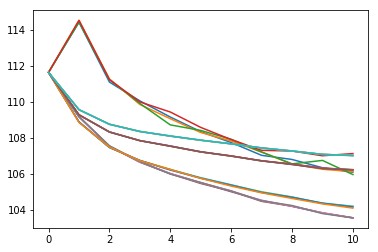

In [12]:
test_loss_array = np.zeros((len(lr_vec), len(annealr_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    j = 0
    for annealr in annealr_vec:
        batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_gumbel_lr' + lr + 
                               '_annealr' + annealr + 
                               '_batch_losses.npy')
        plt.plot(batch_losses, label = lr)
    
        test_loss_array[i, j] = np.load('../mnist_vae_results/tuning_results/ss_vae_gumbel_lr' + lr + 
                                   '_annealr' + annealr + 
                                   '_test_losses.npy')[-1]
        j += 1
    i += 1
    
# plt.legend()

In [13]:
np.unravel_index(test_loss_array.argmin(), test_loss_array.shape)

(1, 3)

In [14]:
(lr_vec[1], annealr_vec[3])

('1e-3', '5e-4')

# REBAR

In [15]:
# for REBAR, there is also a temperature
eta_vec = ['0.2', '0.4', '0.6', '0.8', '1.0'] #, '1.2', '1.4', '1.6', '1.8']

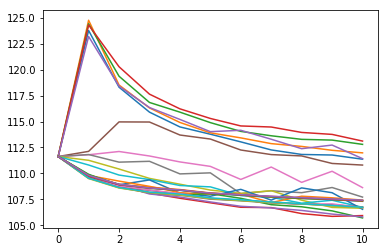

In [16]:
test_loss_array = np.zeros((len(lr_vec), len(eta_vec)))

i = 0

plt.plot()

for lr in lr_vec:
    j = 0
    for eta in eta_vec:
        batch_losses = np.load('../mnist_vae_results/tuning_results/ss_vae_rebar_lr' + lr + 
                               '_eta' + eta + 
                               '_batch_losses.npy')
        plt.plot(batch_losses, label = lr)
    
        test_loss_array[i, j] = np.load('../mnist_vae_results/tuning_results/ss_vae_rebar_lr' + lr + 
                                   '_eta' + eta + 
                                   '_test_losses.npy')[-1]
        j += 1
    i += 1
    

    
# plt.legend()

In [17]:
np.unravel_index(test_loss_array.argmin(), test_loss_array.shape)

(2, 4)

In [25]:
test_loss_array

array([[113.03919983, 114.10475922, 115.23886108, 115.5765686 ,
        114.37494659],
       [111.6883316 , 108.84947205, 108.2520752 , 108.02371979,
        107.8001709 ],
       [107.61999512, 110.91385651, 106.77172089, 106.47678375,
        106.32988739],
       [106.85460663, 106.90292358, 106.76470947, 106.82131958,
        106.76574707],
       [107.32453156, 107.33006287, 107.38422394, 107.33118439,
        107.44458771]])

In [18]:
(lr_vec[2], eta_vec[4])

('5e-4', '1.0')

In [23]:
test_loss_array.min()

106.32988739013672

In [22]:
np.load('../mnist_vae_results/tuning_results2/ss_vae_rebar_lr5e-3_eta1.2_batch_losses.npy')

array([111.622955, 126.92464 , 121.65828 , 119.672615, 118.509544,
       117.5216  , 117.10306 , 116.628914, 116.143654, 115.93708 ,
       115.597565], dtype=float32)

In [24]:
np.load('../mnist_vae_results/tuning_results2/ss_vae_rebar_lr5e-3_eta1.2_test_losses.npy')[-1]

117.83516